In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

from eda_tools import barplot_clusters_stacked



## Abrindo dados

In [15]:
df = pd.read_parquet(path="./../../data/cluster_data/eda_clusters.parquet")
df

,comdate_diff,price,freight_value,commercial_dates_day_since_year_start,commercial_dates_year,commercial_dates_month,commercial_dates_day,order_purchase_day_since_year_start,order_purchase_year,order_purchase_month,...,mean_price_by_commercial_date,std_price_by_commercial_date,commercial_date_coded,time_window_order_coded,filtered_category_coded,cluster,hue,filtered_category,commercial_date,time_window_order
0,11,289.00,46.48,0,2018,1,1,11,2018,1,...,92.179011,169.492277,7,1,13,0,cluster_0,Utilidades domésticas,Não se aplica,Mais de duas semanas
1,-28,259.90,22.31,284,2017,10,12,256,2017,9,...,116.931149,158.173943,7,1,6,1,cluster_1,Esporte e lazer,Não se aplica,Mais de duas semanas
2,-17,14.99,7.78,66,2018,3,8,49,2018,2,...,106.874941,134.596300,1,0,8,2,cluster_2,Acessórios de informática,Dia da Mulher,Duas semanas
3,17,25.00,14.10,0,2018,1,1,17,2018,1,...,108.666584,118.364277,7,1,3,0,cluster_0,Brinquedos,Não se aplica,Mais de duas semanas
4,7,99.90,22.57,0,2018,1,1,7,2018,1,...,82.903521,59.651270,9,1,9,0,cluster_0,Movéis de decoração,Reveillon,Mais de duas semanas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87849,-8,55.00,20.88,358,2017,12,25,350,2017,12,...,100.261696,126.620747,6,0,13,1,cluster_1,Utilidades domésticas,Natal,Duas semanas
87850,3,114.90,14.16,90,2018,4,1,93,2018,4,...,106.242859,104.834845,8,1,6,2,cluster_2,Esporte e lazer,Páscoa,Mais de duas semanas
87851,7,37.00,19.04,90,2018,4,1,97,2018,4,...,115.585435,176.533677,8,1,2,2,cluster_2,Beleza e saúde,Páscoa,Mais de duas semanas
87852,-21,689.00,22.07,327,2017,11,24,306,2017,11,...,204.739577,287.452591,0,0,11,1,cluster_1,Relógios e presentes,Black Friday,Duas semanas


In [16]:
# colunas_categoricas=df.select_dtypes(include=['object']).columns.tolist()
# colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()

# df_data = df.drop(columns=["filtered_category", "commercial_date", "time_window_order"])

# for col in df.columns:
#     title = col
#     if (col in colunas_numericas):
#         title += f"\nDesvio (skew): {round(df[col].skew(), 2)}"
    
#     plt.figure(figsize = (18, 4))
#     plt.subplot(1, 3, 1)
#     df[col].hist()
#     plt.ylabel('count')
#     plt.subplot(1, 3, 2)
#     plt.title(title)
#     sns.boxplot(x=df[col])
#     plt.subplot(1, 3, 3)
#     sns.violinplot(x=df[col])
#     plt.show()

## EDA

### Visão geral dos clusters

         hue    qtd
0  cluster_0  31108
1  cluster_1  18724
2  cluster_2  38021


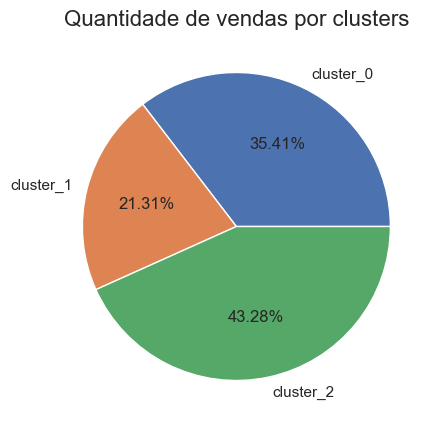

In [17]:
grouped_cluster= df.groupby(['hue'])['hue'].count()
grouped_cluster = grouped_cluster.reset_index(name='qtd')
grouped_cluster
print(grouped_cluster)

plt.figure(figsize=(8, 5))
plt.title('Quantidade de vendas por clusters', fontsize=16)
plt.pie(grouped_cluster['qtd'], labels=grouped_cluster['hue'], autopct='%1.2f%%')
plt.show()

### Qual a relação numérica das vendas por categorias entre os clusters?

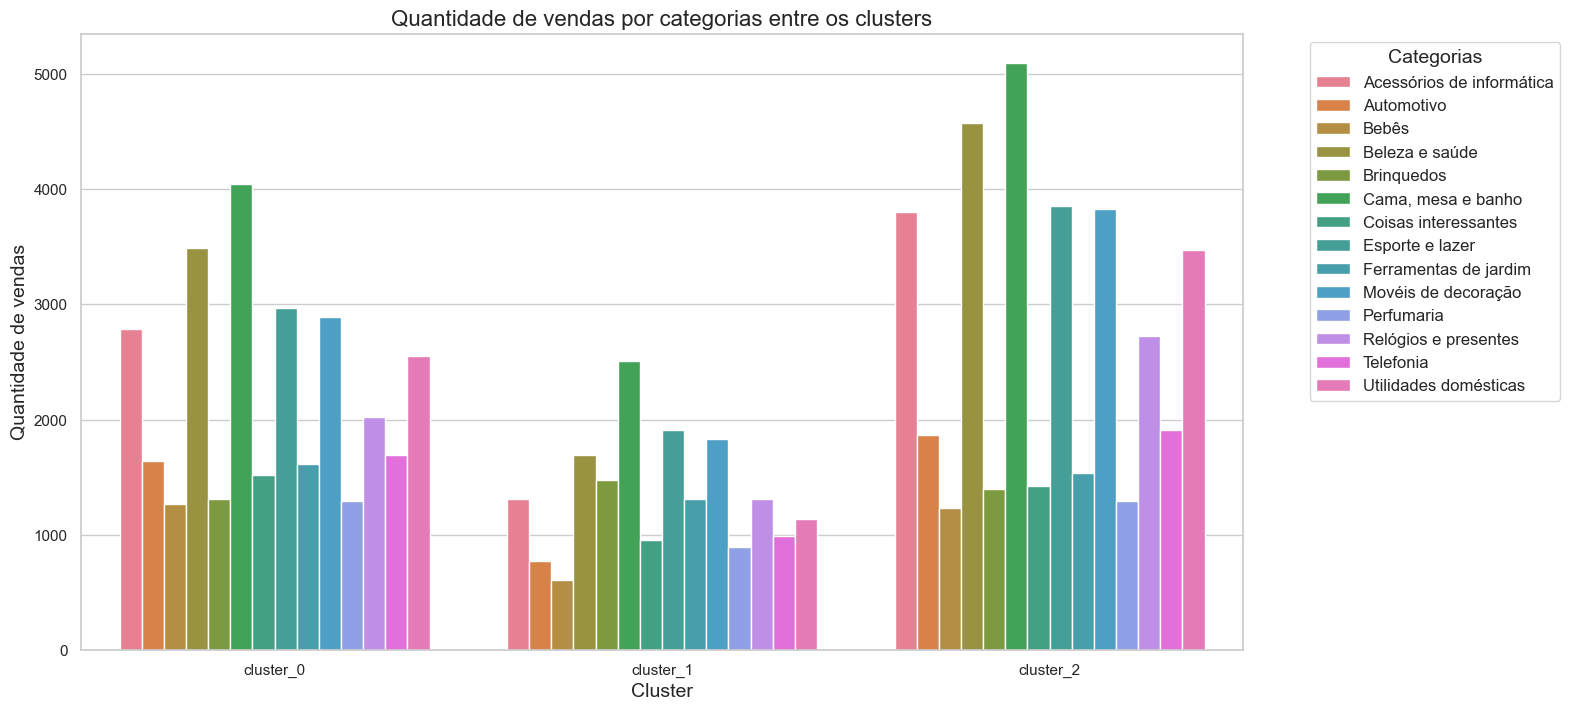

As 3 mais vendidas: Cama, mesa e banho - Beleza e saúde - Esporte e lazer
As 3 menos vendidas: Brinquedos - Perfumaria - Bebês


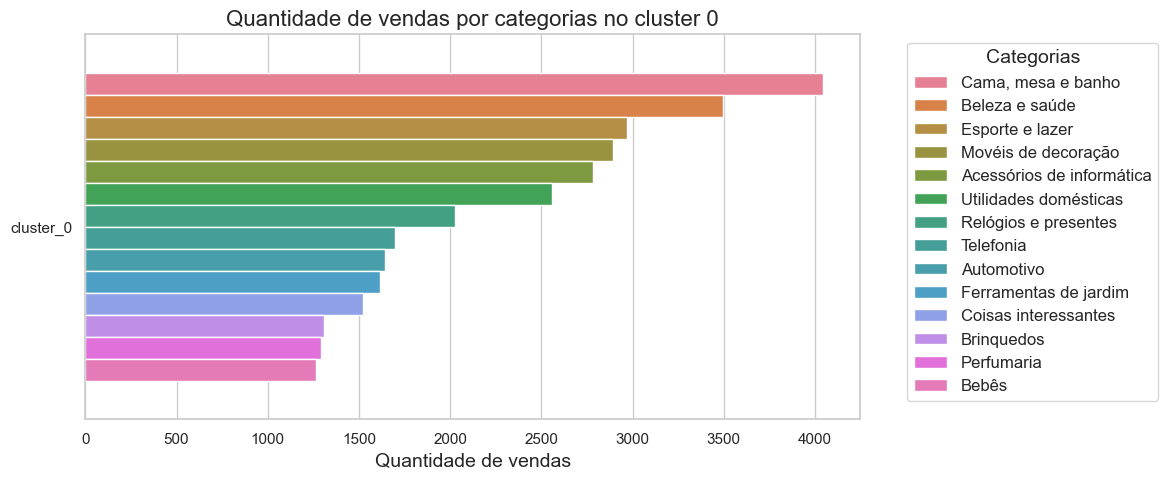

As 3 mais vendidas: Cama, mesa e banho - Esporte e lazer - Movéis de decoração
As 3 menos vendidas: Perfumaria - Automotivo - Bebês


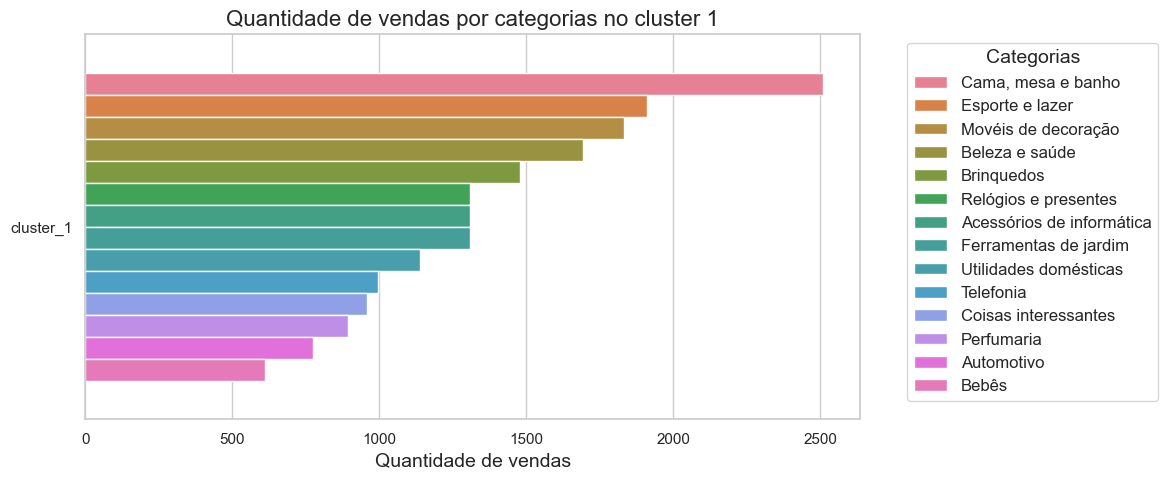

As 3 mais vendidas: Cama, mesa e banho - Beleza e saúde - Esporte e lazer
As 3 menos vendidas: Brinquedos - Perfumaria - Bebês


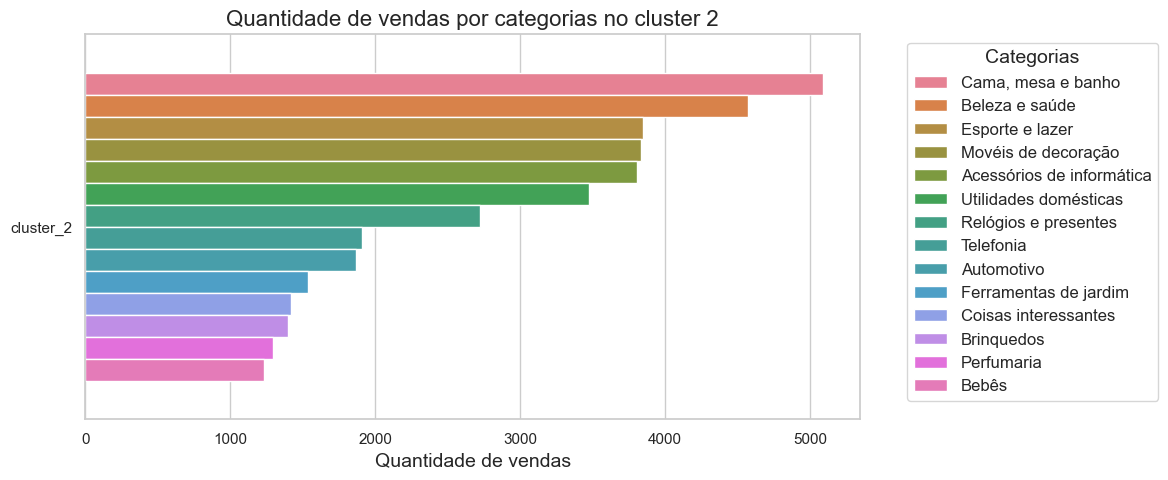

In [18]:
grouped_category_per_cluster= df.groupby(['hue', "filtered_category"])["filtered_category"].count().reset_index(name='qtd_percategory')
grouped_category_per_cluster.to_parquet('../../data/cluster_data/df_grouped_category_per_cluster.parquet')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_category_per_cluster, x='hue', y='qtd_percategory', hue='filtered_category')
plt.title('Quantidade de vendas por categorias entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

for i in range(3):
    plt.figure(figsize=(10, 5))
        
    data_per_cluster = grouped_category_per_cluster[grouped_category_per_cluster['hue'] == f'cluster_{i}'].sort_values(['qtd_percategory'], ascending=False).reset_index(drop=True) 
    top3 = list(data_per_cluster['filtered_category'])[:3]
    lower3 = list(data_per_cluster['filtered_category'])[-3:]
    print(f'As 3 mais vendidas: {" - ".join(top3)}')
    print(f'As 3 menos vendidas: {" - ".join(lower3)}')
    sns.set(style="whitegrid")
    sns.barplot(data=data_per_cluster, x='qtd_percategory', y='hue', hue='filtered_category')
    plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Quantidade de vendas por categorias no cluster {i}', fontsize=16)
    plt.ylabel('')
    plt.xlabel('Quantidade de vendas', fontsize=14)
    plt.show()


### Qual a relação numérica das vendas por feriados entre os clusters?

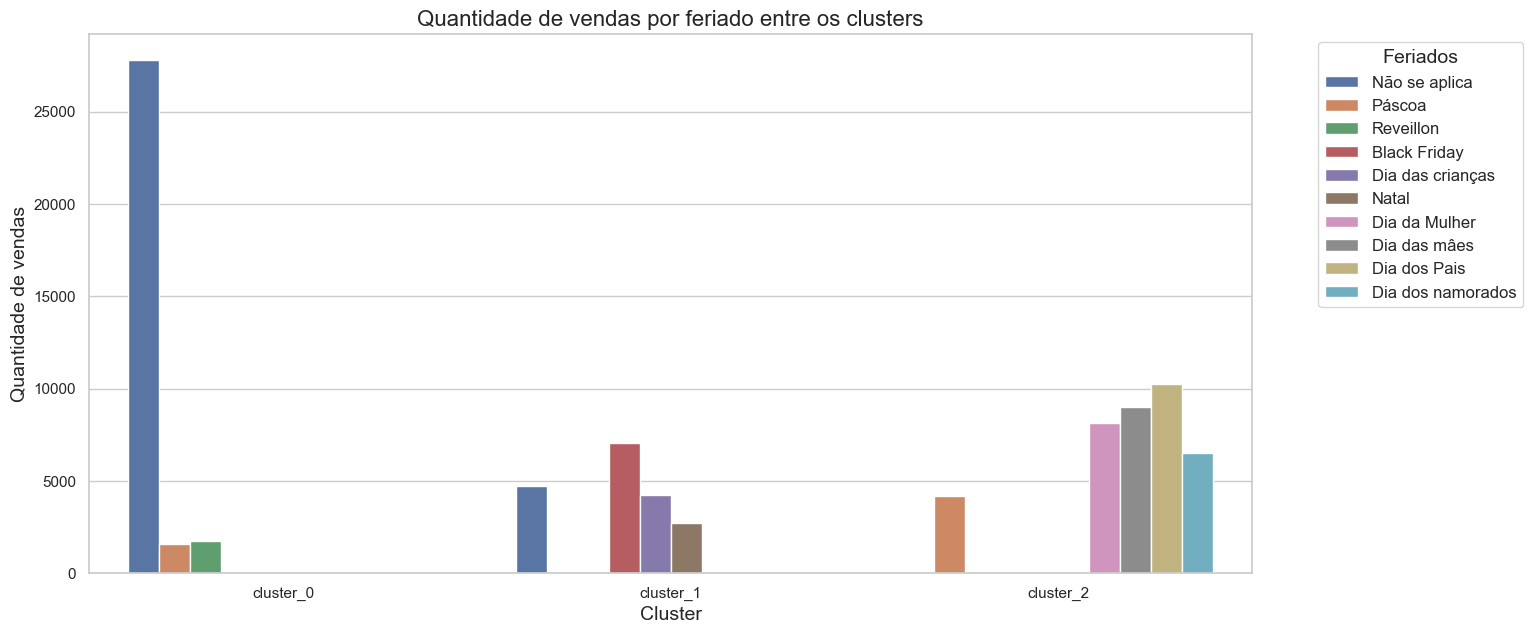

         hue commercial_date  qtd_percommercialdate
0  cluster_0   Não se aplica                  27808
1  cluster_0       Reveillon                   1735
2  cluster_0          Páscoa                   1565


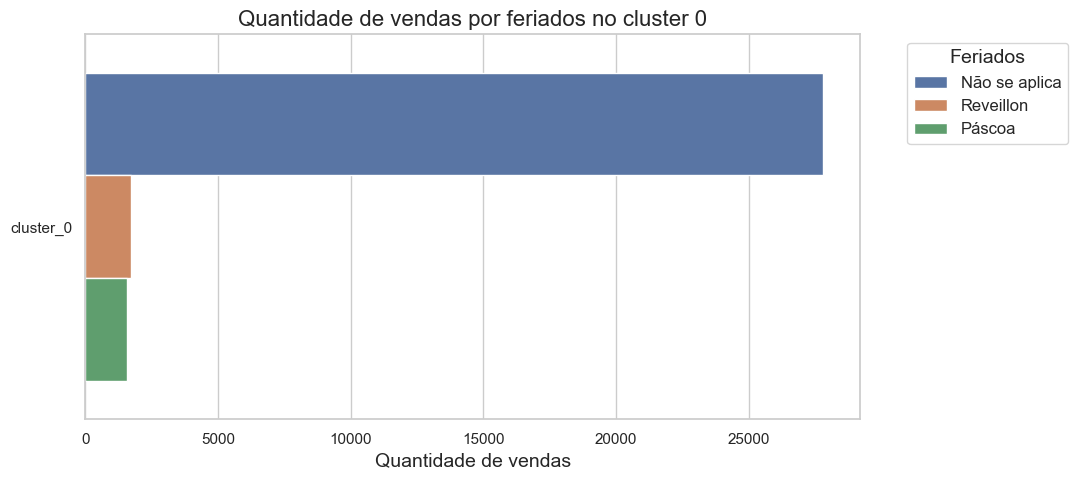

         hue   commercial_date  qtd_percommercialdate
0  cluster_1      Black Friday                   7055
1  cluster_1     Não se aplica                   4740
2  cluster_1  Dia das crianças                   4230
3  cluster_1             Natal                   2699


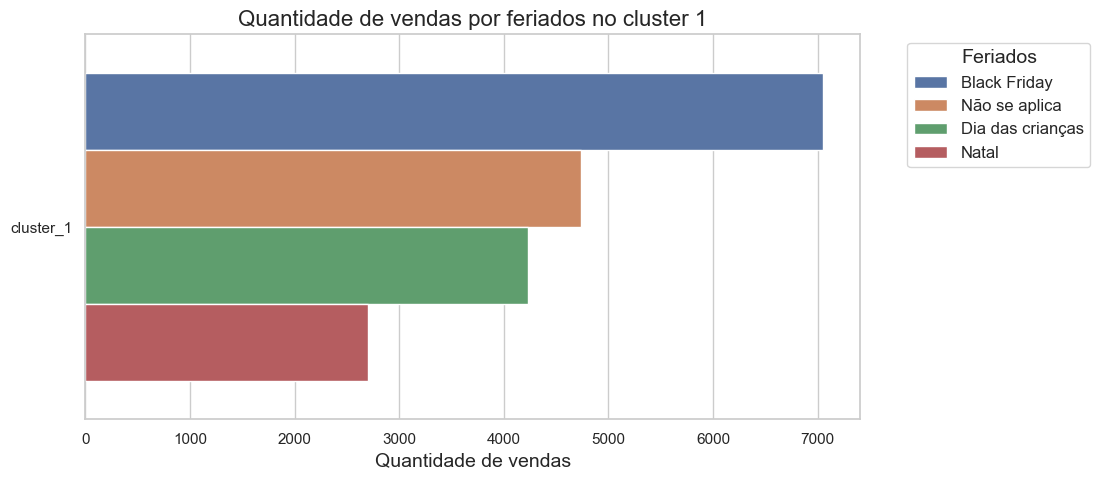

         hue    commercial_date  qtd_percommercialdate
0  cluster_2       Dia dos Pais                  10261
1  cluster_2       Dia das mâes                   8973
2  cluster_2      Dia da Mulher                   8118
3  cluster_2  Dia dos namorados                   6504
4  cluster_2             Páscoa                   4165


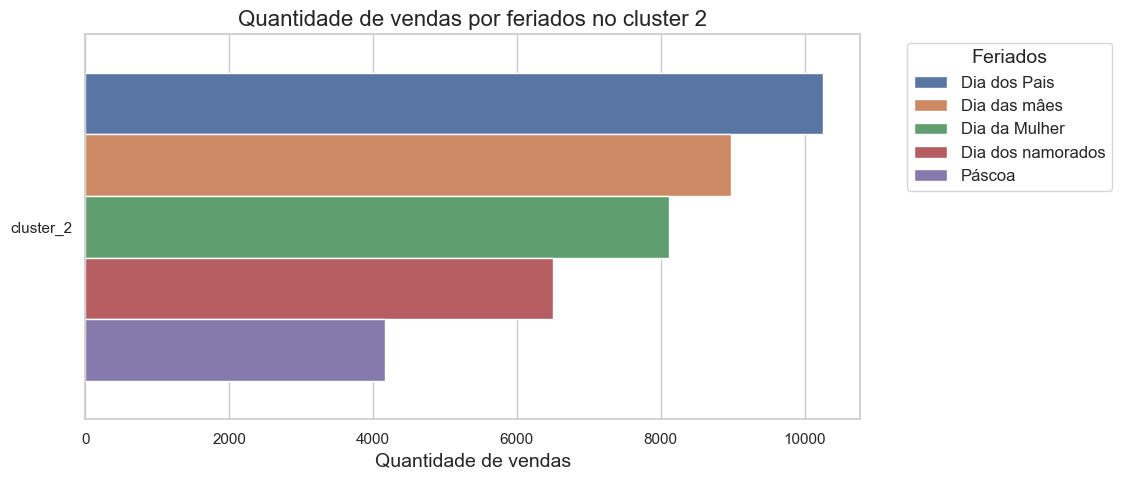

In [19]:
grouped_commercialdate_per_cluster= df.groupby(['hue', "commercial_date"])["commercial_date"].count()
grouped_commercialdate_per_cluster = grouped_commercialdate_per_cluster.reset_index(name='qtd_percommercialdate')
grouped_commercialdate_per_cluster.to_parquet('../../data/cluster_data/df_grouped_commercialdate_per_cluster.parquet')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=grouped_commercialdate_per_cluster, x='hue', y='qtd_percommercialdate', hue='commercial_date')
plt.title('Quantidade de vendas por feriado entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Feriados', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


for i in range(3):
    plt.figure(figsize=(10, 5))
        
    data_per_cluster = grouped_commercialdate_per_cluster[grouped_commercialdate_per_cluster['hue'] == f'cluster_{i}'].sort_values(['qtd_percommercialdate'], ascending=False).reset_index(drop=True) 
    print(data_per_cluster)
    sns.set(style="whitegrid")
    sns.barplot(data=data_per_cluster, x='qtd_percommercialdate', y='hue', hue='commercial_date')
    plt.legend(title='Feriados', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Quantidade de vendas por feriados no cluster {i}', fontsize=16)
    plt.ylabel('')
    plt.xlabel('Quantidade de vendas', fontsize=14)
    plt.show()

In [20]:
grouped_commercialdate_per_cluster

,hue,commercial_date,qtd_percommercialdate
0,cluster_0,Não se aplica,27808
1,cluster_0,Páscoa,1565
2,cluster_0,Reveillon,1735
3,cluster_1,Black Friday,7055
4,cluster_1,Dia das crianças,4230
5,cluster_1,Natal,2699
6,cluster_1,Não se aplica,4740
7,cluster_2,Dia da Mulher,8118
8,cluster_2,Dia das mâes,8973
9,cluster_2,Dia dos Pais,10261


Não se aplica 0.0
Páscoa 0.6283185307179586
Reveillon 1.2566370614359172
Black Friday 1.8849555921538759
Dia das crianças 2.5132741228718345
Natal 3.141592653589793
Dia da Mulher 3.7699111843077517
Dia das mâes 4.39822971502571
Dia dos Pais 5.026548245743669
Dia dos namorados 5.654866776461628


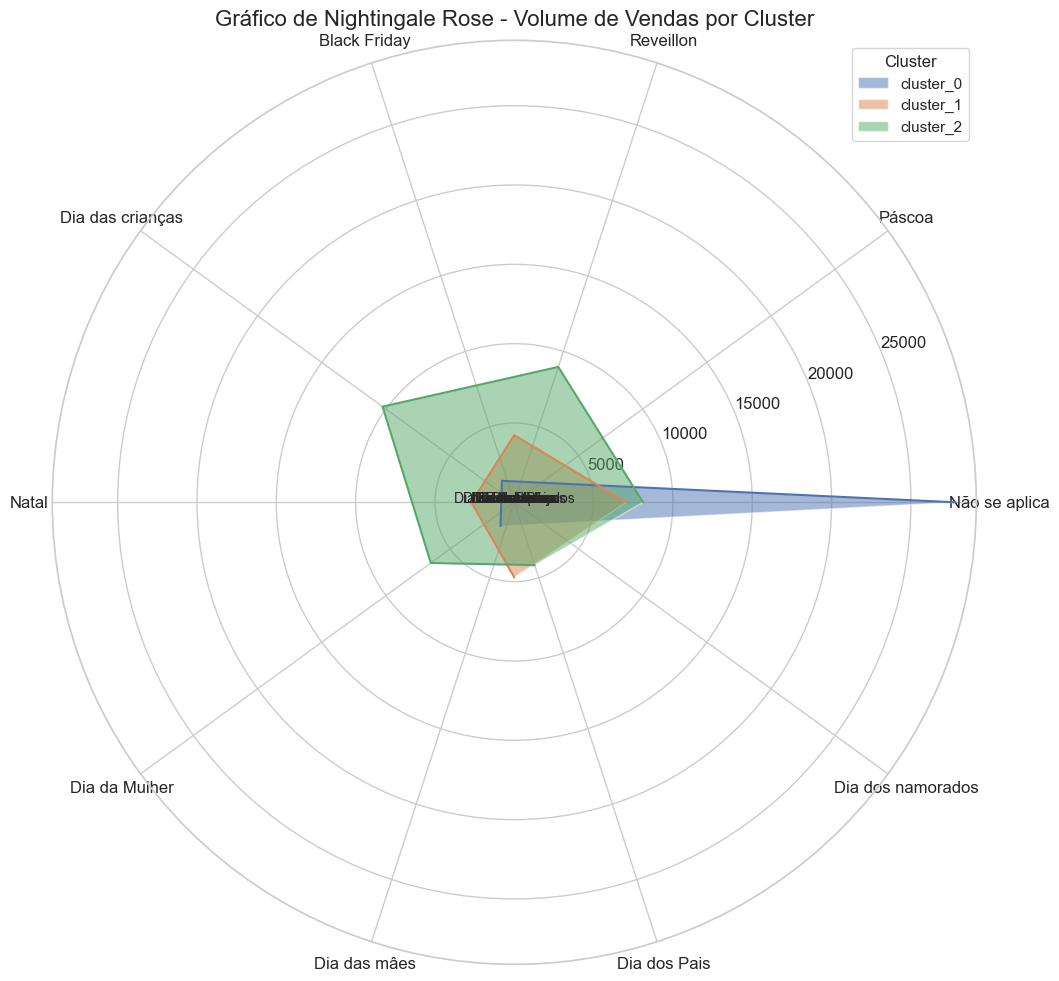

In [21]:
plt.figure(figsize=(12, 12))
clusters = grouped_commercialdate_per_cluster['hue'].unique()
n_clusters = len(clusters)
feriados = grouped_commercialdate_per_cluster['commercial_date'].unique()

for a, b in zip(feriados, np.linspace(0, 2 * np.pi, len(feriados), endpoint=False)):
    print(a, b)

for i, cluster in enumerate(clusters):
    cluster_data = grouped_commercialdate_per_cluster[grouped_commercialdate_per_cluster['hue'] == cluster]
    theta = np.linspace(0, 2 * np.pi, len(cluster_data), endpoint=False).tolist()
    sales_volume = cluster_data['qtd_percommercialdate'].values

    plt.subplot(111, polar=True)
    plt.fill(theta, sales_volume, alpha=0.5, label=cluster)  # Ajuste a transparência aqui
    plt.plot(theta, sales_volume)

for feriado, angulo in zip(feriados, np.linspace(0, 2 * np.pi, len(feriados), endpoint=False)):
    plt.text(angulo, 0, feriado, horizontalalignment='center', fontsize=10)

plt.title('Gráfico de Nightingale Rose - Volume de Vendas por Cluster', fontsize=16)
plt.xticks(np.linspace(0, 2 * np.pi, len(feriados), endpoint=False), feriados, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

### Dentre os feriados listados, qual a relação das vendas por categorias para cada feriado nos clusters

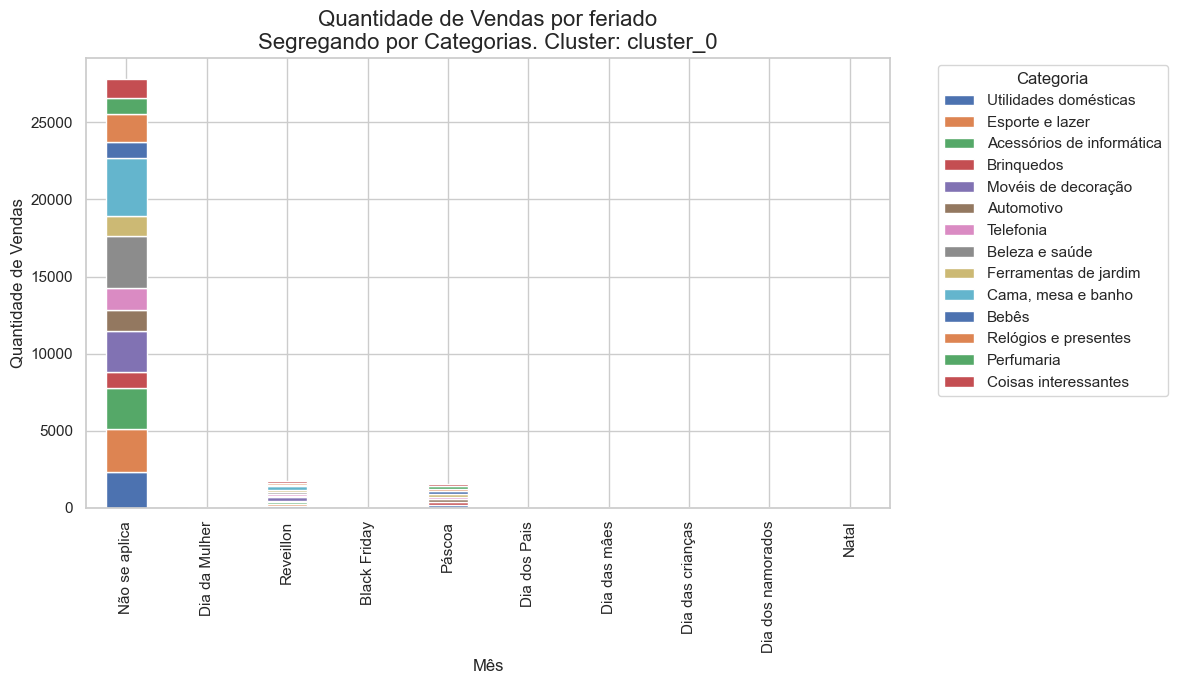

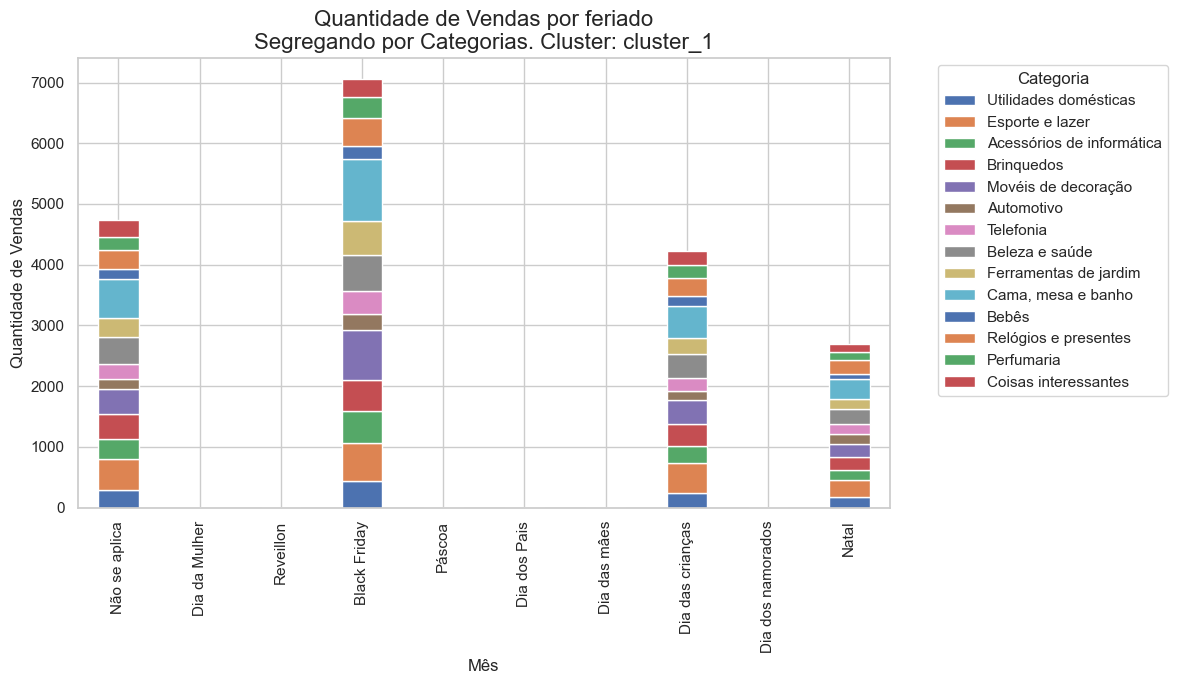

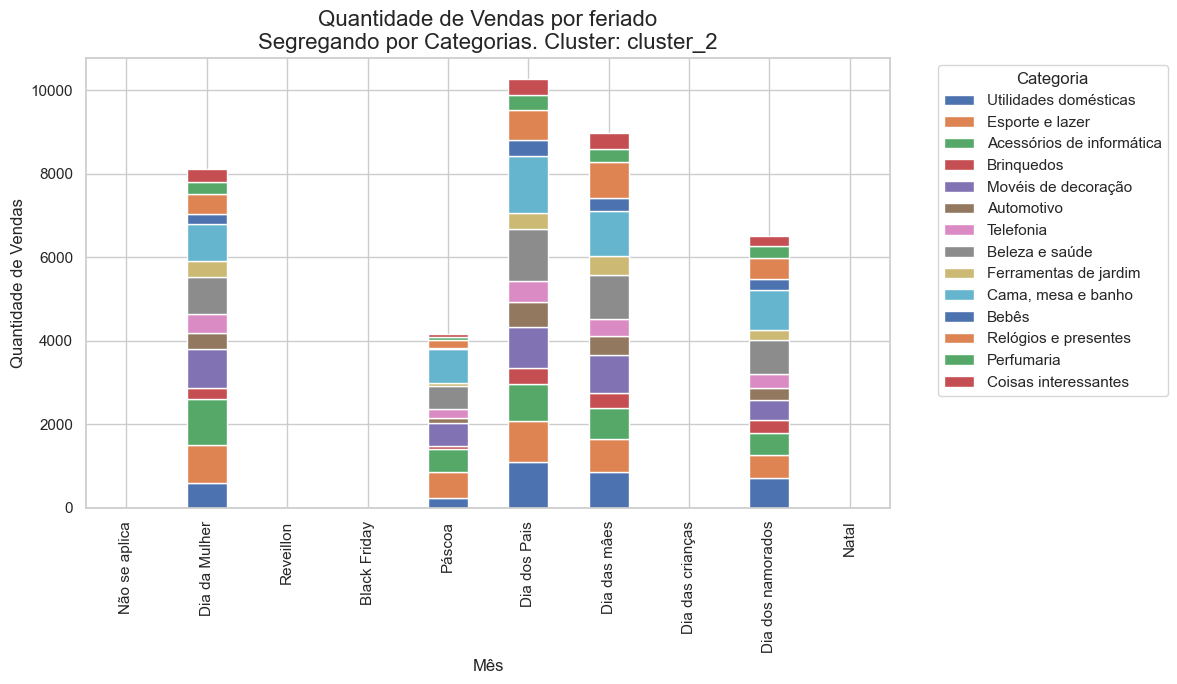

In [22]:
gp_categorias_por_cluster_datacomercial = df.groupby(['hue', "commercial_date", "filtered_category"])["commercial_date"].count()
gp_categorias_por_cluster_datacomercial = gp_categorias_por_cluster_datacomercial.reset_index(name='qtd')

combinacoes = pd.MultiIndex.from_product(
    [df['hue'].unique(), df['commercial_date'].unique(), df['filtered_category'].unique()],
    names=['hue', 'commercial_date', 'filtered_category']
).to_frame(index=False)

gp_categorias_por_cluster_datacomercial_completo = pd.merge(
    combinacoes, 
    gp_categorias_por_cluster_datacomercial, 
    on=['hue', 'commercial_date', 'filtered_category'], 
    how='left'
).fillna(0)

gp_categorias_por_cluster_datacomercial_completo['qtd'] = gp_categorias_por_cluster_datacomercial_completo['qtd'].astype(int)

dfs_por_cluster = {}
for cluster in list(gp_categorias_por_cluster_datacomercial_completo['hue'].unique()):
    df_cluster = gp_categorias_por_cluster_datacomercial_completo[gp_categorias_por_cluster_datacomercial_completo['hue'] == cluster]
    df_cluster.drop(columns=['hue'], inplace=True)

    df_novo_index = df_cluster['commercial_date'].unique().tolist() 
    df_novo_colunas = df_cluster['filtered_category'].unique().tolist()
    df_novo_dados = df_cluster['qtd'].to_numpy().reshape(len(df_novo_index), len(df_novo_colunas))

    dfs_por_cluster[cluster] = pd.DataFrame(df_novo_dados, index=df_novo_index, columns=df_novo_colunas)

# barplot_clusters_stacked(dfs_por_cluster, l2_loc=[1.09, 0.4], title="Quantidade de vendas por feriados\nSegregando por categorias do feriado e por cluster")

for cluster, df_cluster in dfs_por_cluster.items():
    ax = df_cluster.plot(kind='bar', stacked=True, figsize=(12, 7))
    
    plt.title(f'Quantidade de Vendas por feriado\nSegregando por Categorias. Cluster: {cluster}', fontsize=16)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Quantidade de Vendas', fontsize=12)
    
    plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Dentre os meses do ano, qual a relação das vendas por categorias para cada mês nos clusters

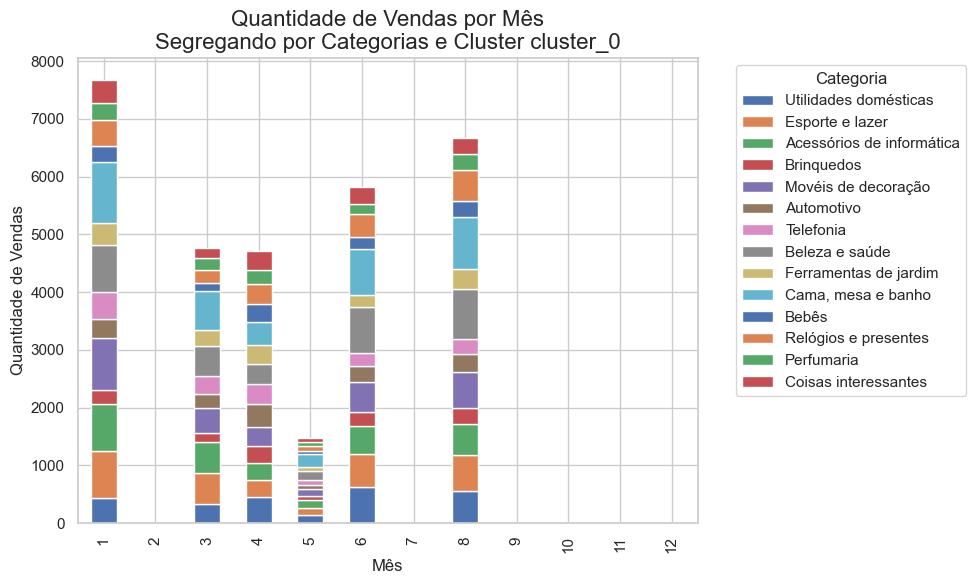

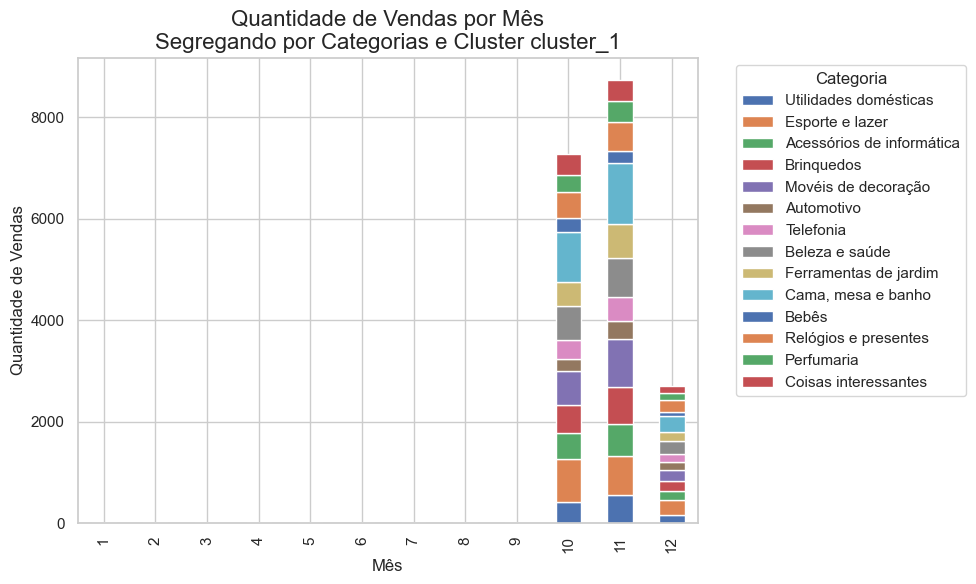

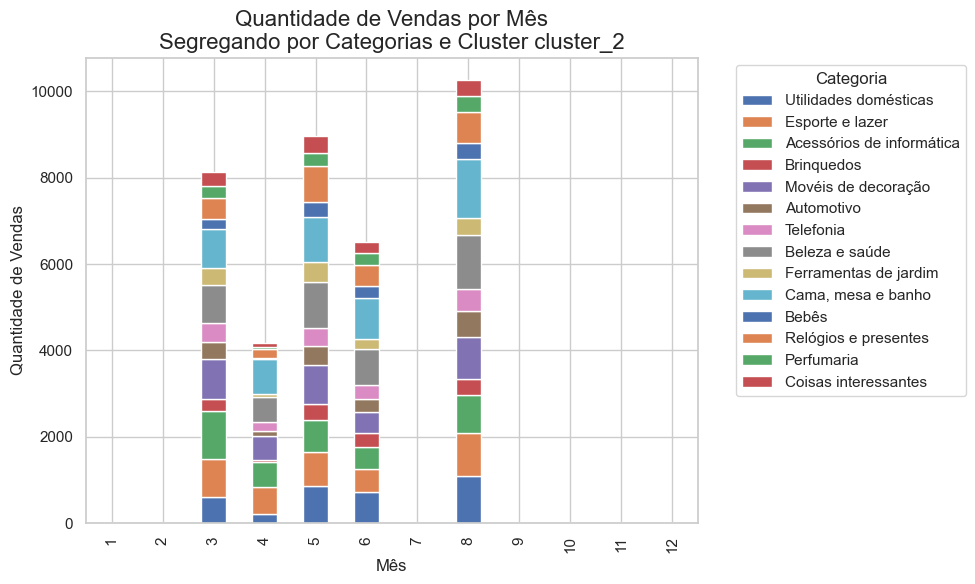

In [23]:
df['commercial_dates_month'] = df['commercial_dates_month'].astype(int)

gp_categorias_por_cluster_mes = df.groupby(['hue', "commercial_dates_month", "filtered_category"])["commercial_dates_month"].count()
gp_categorias_por_cluster_mes = gp_categorias_por_cluster_mes.reset_index(name='qtd')

combinacoes_mes = pd.MultiIndex.from_product(
    [df['hue'].unique(), range(1, 13), df['filtered_category'].unique()],
    names=['hue', 'commercial_dates_month', 'filtered_category']
).to_frame(index=False)


gp_categorias_por_cluster_mes_completo = pd.merge(
    combinacoes_mes, 
    gp_categorias_por_cluster_mes, 
    on=['hue', 'commercial_dates_month', 'filtered_category'], 
    how='left'
).fillna(0)

gp_categorias_por_cluster_mes_completo['qtd'] = gp_categorias_por_cluster_mes_completo['qtd'].astype(int)

dfs_por_cluster_mes = {}
for cluster in list(gp_categorias_por_cluster_mes_completo['hue'].unique()):
    df_cluster = gp_categorias_por_cluster_mes_completo[gp_categorias_por_cluster_mes_completo['hue'] == cluster]
    df_cluster.drop(columns=['hue'], inplace=True)

    df_novo_index = df_cluster['commercial_dates_month'].unique().tolist() 
    df_novo_colunas = df_cluster['filtered_category'].unique().tolist()
    df_novo_dados = df_cluster['qtd'].to_numpy().reshape(len(df_novo_index), len(df_novo_colunas))

    dfs_por_cluster_mes[cluster] = pd.DataFrame(df_novo_dados, index=df_novo_index, columns=df_novo_colunas)
    
# barplot_clusters_stacked(dfs_por_cluster_mes, l2_loc=[1.09, 0.4], title="Quantidade de Vendas por Mês\nSegregando por Categorias e Clusters")

for cluster, df_cluster in dfs_por_cluster_mes.items():
    ax = df_cluster.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Quantidade de Vendas por Mês\nSegregando por Categorias e Cluster {cluster}', fontsize=16)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Quantidade de Vendas', fontsize=12)
    
    plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Qual a relação do valor das vendas nos cluster?

In [24]:
df_datetime = df[['order_purchase_year', 'order_purchase_month', 'order_purchase_day']].rename(columns={
    'order_purchase_year': 'year',
    'order_purchase_month': 'month',
    'order_purchase_day': 'day'
})

df_per_date = df.copy()
df_per_date['order_purchase_date'] = pd.to_datetime(df_datetime)
df_per_date.sort_values('order_purchase_date', inplace=True)

In [25]:
price_month_ohlc = df_per_date.set_index(keys='order_purchase_date',)['price'].resample('M').ohlc()
price_month_ohlc

fig_ohlc = go.Figure(data=go.Ohlc(x=price_month_ohlc.index,
                    open=price_month_ohlc['open'],
                    high=price_month_ohlc['high'],
                    low=price_month_ohlc['low'],
                    close=price_month_ohlc['close']))
fig_ohlc.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Qual a relação do valor do frete das vendas nos cluster?

### Quantidade de vendas por cluster durante o ano, em gráfico de linha

    month        hue  sales_volume
0       1  cluster_0          6843
1       2  cluster_0          3576
2       2  cluster_2          3801
3       3  cluster_0          2487
4       3  cluster_2          6226
5       4  cluster_0          3896
6       4  cluster_2          4172
7       5  cluster_0          1469
8       5  cluster_2          8002
9       6  cluster_0          2907
10      6  cluster_2          5559
11      7  cluster_0          5873
12      7  cluster_2          3169
13      8  cluster_0          2351
14      8  cluster_2          7092
15      9  cluster_0          1358
16      9  cluster_1          2592
17     10  cluster_1          4594
18     11  cluster_1          7006
19     12  cluster_0           348
20     12  cluster_1          4532


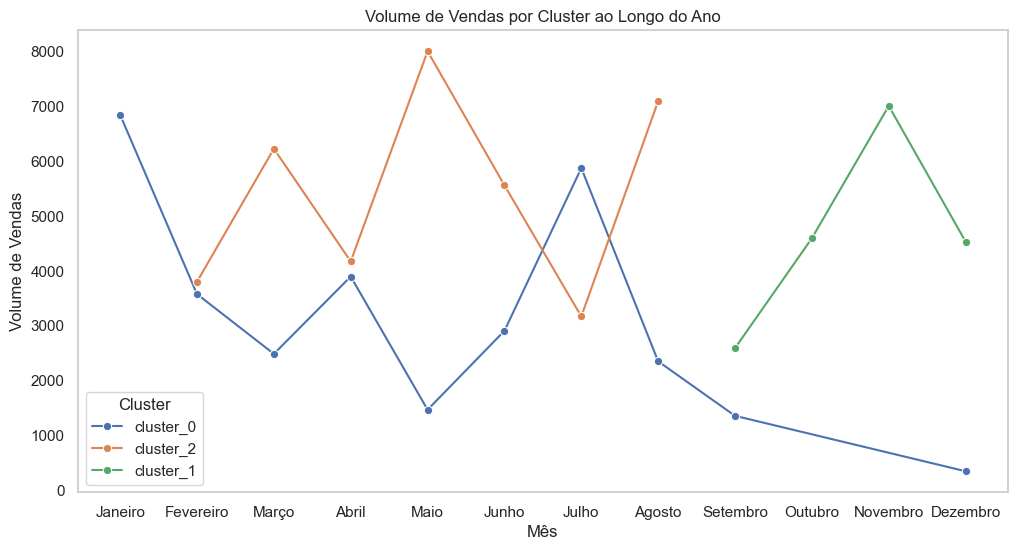

In [26]:
df_datetime = df[['order_purchase_year', 'order_purchase_month', 'order_purchase_day']].rename(columns={
    'order_purchase_year': 'year',
    'order_purchase_month': 'month',
    'order_purchase_day': 'day'
})

df['order_purchase_date'] = pd.to_datetime(df_datetime)
df['month'] = df['order_purchase_date'].dt.month

sales_per_cluster = df.groupby(['month', 'hue']).size().reset_index(name='sales_volume')
print(sales_per_cluster) 

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_cluster, x='month', y='sales_volume', hue='hue', marker='o')
plt.title('Volume de Vendas por Cluster ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas')
plt.xticks(ticks=range(1, 13), labels=[
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
])
plt.legend(title='Cluster')
plt.grid()
plt.show()

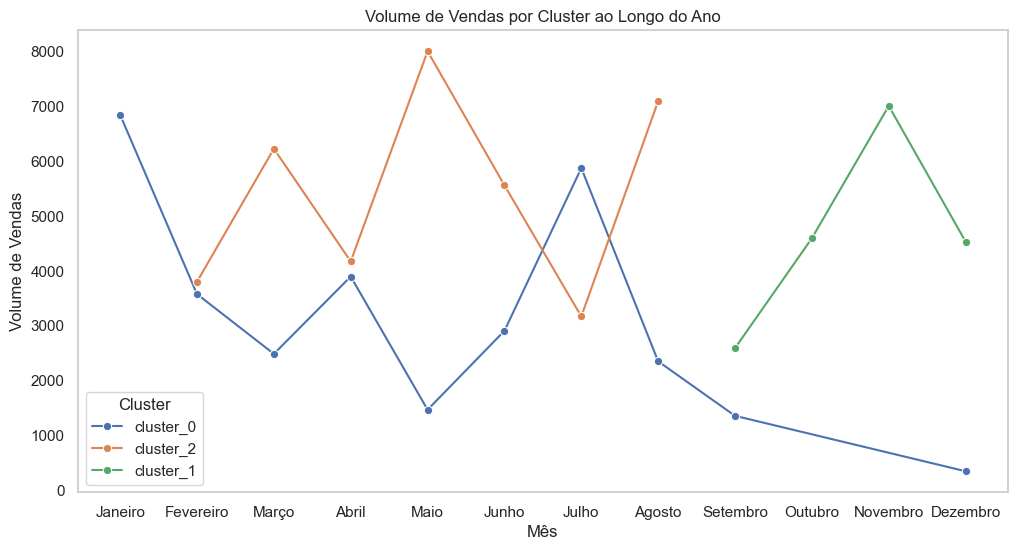

In [27]:
df_datetime = df[['order_purchase_year', 'order_purchase_month', 'order_purchase_day']].rename(columns={
    'order_purchase_year': 'year',
    'order_purchase_month': 'month',
    'order_purchase_day': 'day'
})
df_per_date = df.copy()
df_per_date.index = pd.to_datetime(df_datetime)
df_per_date = df_per_date[['price', 'freight_value', 'hue']]

df_per_date_cluster = df_per_date.groupby([df_per_date.index.to_period('M'), 'hue']).sum().reset_index()
df_per_date_cluster

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_cluster, x='month', y='sales_volume', hue='hue', marker='o')
plt.title('Volume de Vendas por Cluster ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas')
plt.xticks(ticks=range(1, 13), labels=[
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
])
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [42]:
df_feriado = df[['price', 'freight_value', 'hue', 'commercial_date']]
df_feriado

df_feriado_cluster = df_feriado.groupby(['commercial_date', 'hue']).sum().reset_index()
df_feriado_cluster

,commercial_date,hue,price,freight_value
0,Black Friday,cluster_1,793503.50,132446.94
1,Dia da Mulher,cluster_2,934315.24,156190.66
2,Dia das crianças,cluster_1,478352.04,80822.82
3,Dia das mâes,cluster_2,1074626.84,168470.86
4,Dia dos Pais,cluster_2,1209427.17,210509.22
5,Dia dos namorados,cluster_2,813256.13,131048.91
6,Natal,cluster_1,315887.70,50604.92
7,Não se aplica,cluster_0,3176906.17,540032.75
8,Não se aplica,cluster_1,551655.75,90491.52
9,Páscoa,cluster_0,213232.19,32157.44


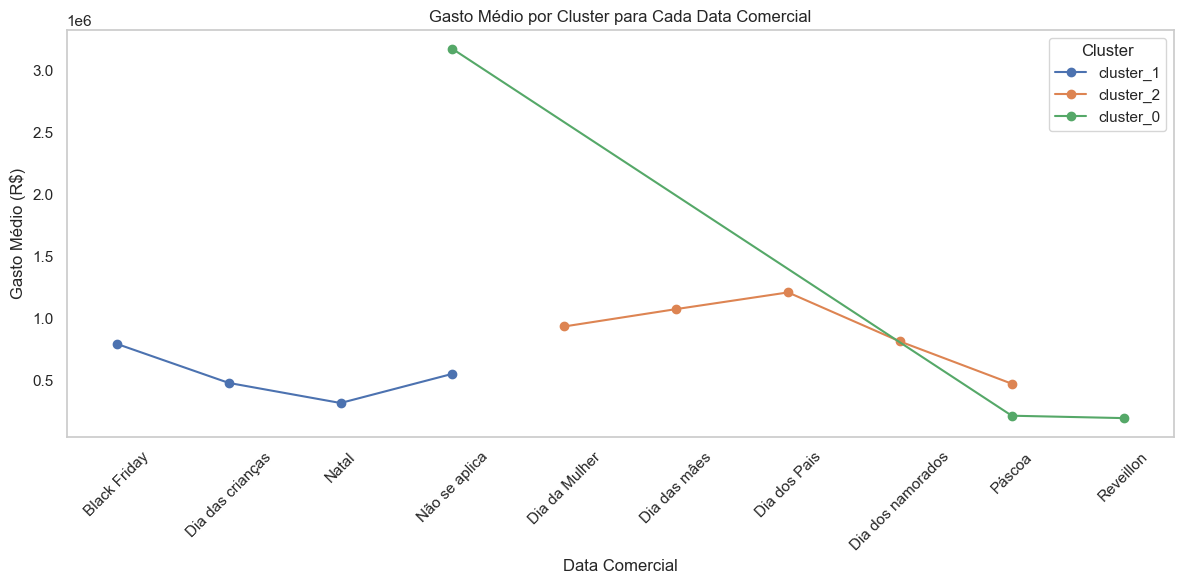

In [52]:
# Calcular o gasto médio por data comercial e cluster
gasto_medio = df_feriado_cluster.groupby(['commercial_date', 'hue'])['price'].mean().reset_index()

# Plotar
plt.figure(figsize=(12, 6))

# Usando um gráfico de linha
for cluster in gasto_medio['hue'].unique():
    subset = gasto_medio[gasto_medio['hue'] == cluster]
    plt.plot(subset['commercial_date'], subset['price'], marker='o', label=cluster)

plt.title('Gasto Médio por Cluster para Cada Data Comercial')
plt.xlabel('Data Comercial')
plt.ylabel('Gasto Médio (R$)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [64]:
# Calcular o gasto total
df_feriado_cluster['total_spending'] = df_feriado_cluster['price'] + df_feriado_cluster['freight_value']

# Agrupar por data comercial e cluster
avg_spending = df_feriado_cluster.groupby(['commercial_date', 'hue'])['total_spending'].mean().unstack().fillna(0)

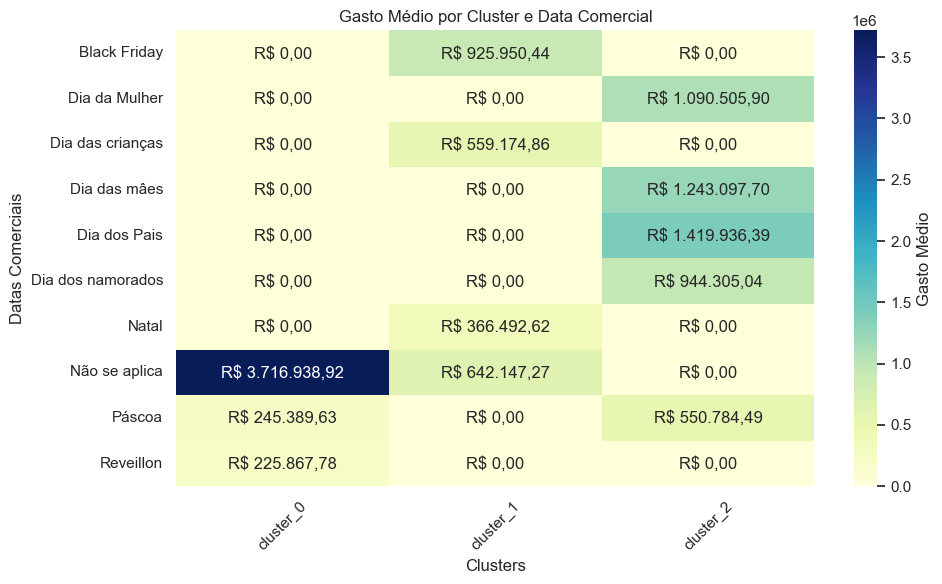

In [67]:
# Função para formatar os valores em reais
def formatar_reais(valor):
    return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Aplicar a formatação
avg_spending_formatted = avg_spending.applymap(formatar_reais)

# Plotar um heatmap com valores formatados
plt.figure(figsize=(10, 6))
sns.heatmap(avg_spending, annot=avg_spending_formatted.values, fmt="", cmap="YlGnBu", cbar_kws={'label': 'Gasto Médio'})
plt.title('Gasto Médio por Cluster e Data Comercial')
plt.xlabel('Clusters')
plt.ylabel('Datas Comerciais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
# Tabela estilizada
styled_table = avg_spending.style.background_gradient(cmap='YlGnBu').set_table_attributes('style="width: 100%; margin: 20px 0;"')
styled_table

hue,cluster_0,cluster_1,cluster_2
commercial_date,,,
Black Friday,0.000000,925950.440000,0.000000
Dia da Mulher,0.000000,0.000000,1090505.900000
Dia das crianças,0.000000,559174.860000,0.000000
Dia das mâes,0.000000,0.000000,1243097.700000
Dia dos Pais,0.000000,0.000000,1419936.390000
Dia dos namorados,0.000000,0.000000,944305.040000
Natal,0.000000,366492.620000,0.000000
Não se aplica,3716938.920000,642147.270000,0.000000
Páscoa,245389.630000,0.000000,550784.490000


               hue      
price          cluster_0    1.194680e+06
               cluster_1    5.348497e+05
               cluster_2    9.006863e+05
freight_value  cluster_0    2.013852e+05
               cluster_1    8.859155e+04
               cluster_2    1.490396e+05
dtype: float64


AttributeError: 'Series' object has no attribute 'columns'

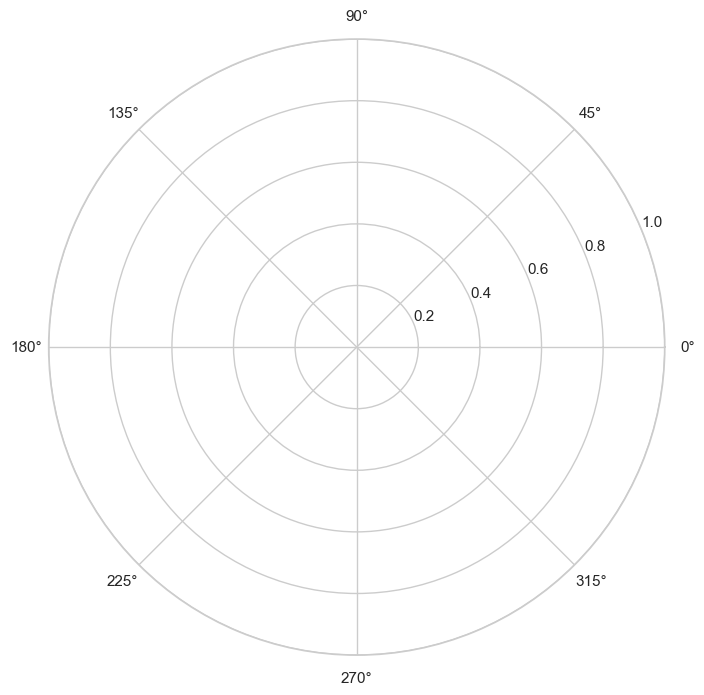

In [43]:
# Suponha que o df_feriado_cluster já esteja carregado e tenha os valores médios por cluster
df_pivot = df_feriado_cluster.pivot(index='commercial_date', columns='hue', values=['price', 'freight_value'])
df_means = df_pivot.mean()

print(df_means)

# Gráfico de Radar
labels = df_means.index.get_level_values(1).unique()
n_clusters = len(labels)
angles = np.linspace(0, 2 * np.pi, len(df_means), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Para cada cluster, plotar uma linha no gráfico de radar
for i, cluster in enumerate(df_means.columns):
    values = df_means[cluster].tolist()
    values += values[:1]  # Repetir o primeiro valor para fechar o gráfico
    ax.plot(angles, values, label=cluster, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_means.index.get_level_values(0).unique(), size=12)
ax.set_title('Médias por Cluster - Gráfico de Radar', size=15, pad=20)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

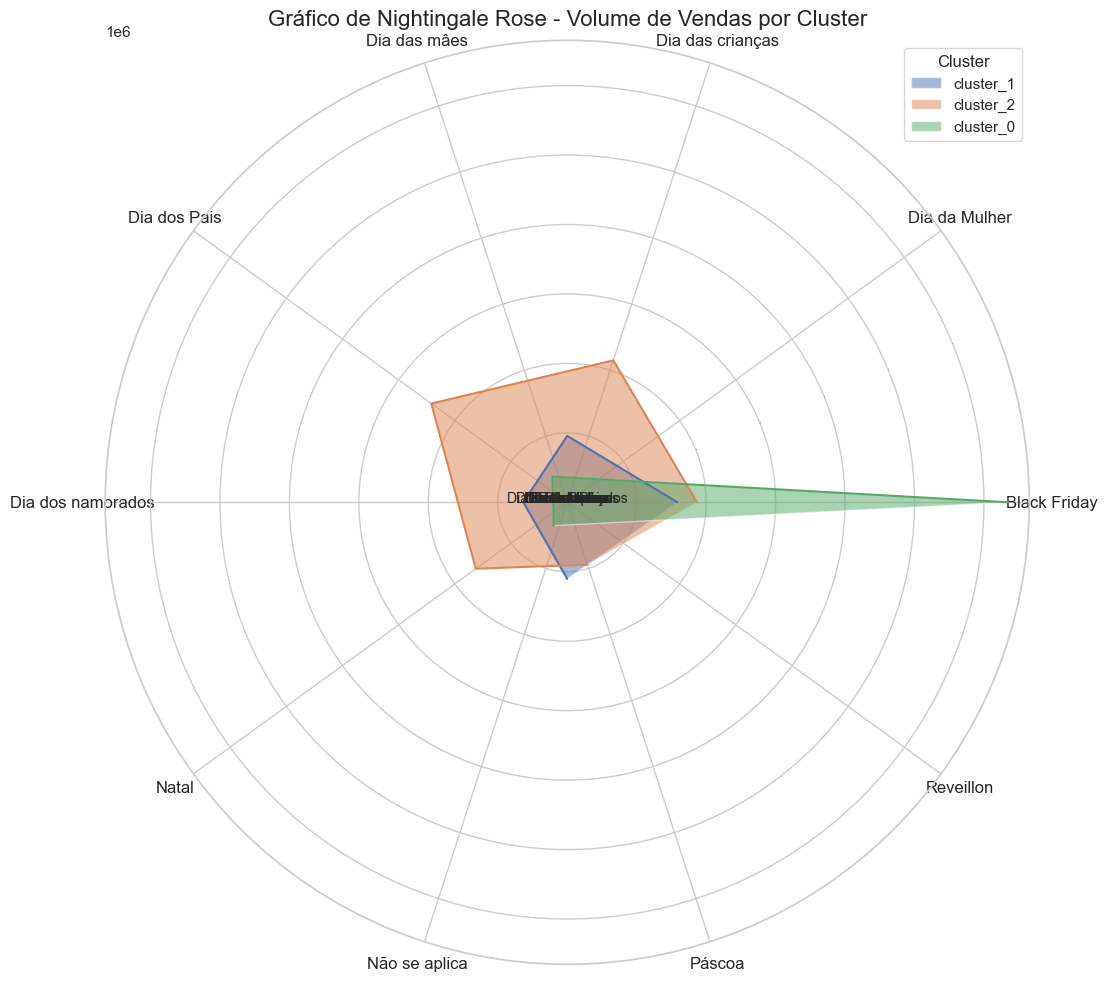

In [30]:
plt.figure(figsize=(12, 12))

clusters = df_feriado_cluster['hue'].unique()
n_clusters = len(clusters)
feriados = df_feriado_cluster['commercial_date'].unique()

for i, cluster in enumerate(clusters):
    cluster_data = df_feriado_cluster[df_feriado_cluster['hue'] == cluster]
    theta = np.linspace(0, 2 * np.pi, len(cluster_data), endpoint=False).tolist()
    sales_volume = cluster_data['price'].values

    plt.subplot(111, polar=True)
    plt.fill(theta, sales_volume, alpha=0.5, label=cluster)  # Ajuste a transparência aqui
    plt.plot(theta, sales_volume)

for feriado, angulo in zip(feriados, np.linspace(0, 2 * np.pi, len(feriados), endpoint=False)):
    plt.text(angulo, 0, feriado, horizontalalignment='center', fontsize=10)

plt.title('Gráfico de Nightingale Rose - Volume de Vendas por Cluster', fontsize=16)
plt.xticks(np.linspace(0, 2 * np.pi, len(feriados), endpoint=False), feriados, fontsize=12)
plt.yticks(fontsize=12)
plt.xticks()
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)